In [6]:
import pickle
import numpy as np

f=open("/media/maria/DATA/BrainObservatoryProcessedData/openai_clip-vit-base-patch32_embeddings.pkl",'rb')
currents=pickle.load(f)['natural_movie_one']
mn=np.min(currents)
print(mn)
currents=currents+(-mn)
print(np.max(currents))

-12.493422508239746
17.570687294006348


In [7]:
print(currents.shape)

(900, 768)


In [12]:
from brian2 import *

start_scope()
#stimulus = TimedArray(np.tile([100., 0.], 5)*Hz, dt=100.*ms)
stimulus=TimedArray(currents[:,0]*Hz, dt=1.*ms)
P = PoissonGroup(100, rates='stimulus(t)')

M = SpikeMonitor(P)

run(1000*ms) 

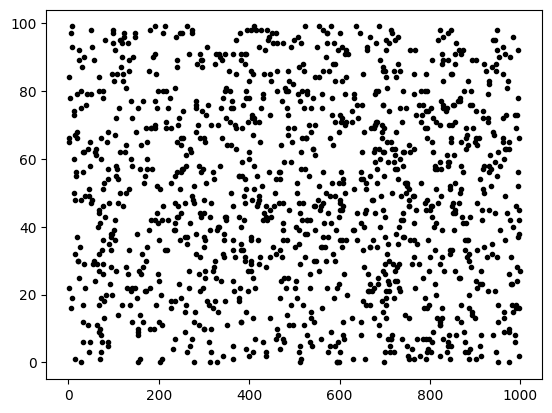

In [13]:
plot(M.t/ms, M.i, '.k')